### Enthalpy as a function of temperature and ideal gas behaviour

In [2]:
#import modules

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sympy as sp

In [3]:
#constants
R=8.314
T0 = 298 #kelvin
T = np.linspace(T0,900,1000) #kelvin
DHR_298 = -45.940*2 * 1000 #j/mol
DSR_298=-198.110 # j/(mol*K)

DGR_298  = DHR_298 - T0 * DSR_298 #j/mol
K_298 = np.exp(-DGR_298/(R*T0))


# initialising and defining arrays
temps = np.linspace(298,900,1000)
H = np.zeros_like(temps)
S = np.zeros_like(temps)
G = np.zeros_like(temps)
P = np.array([0.01,1,10,25,50,100,200,500])


# CP CONSTANTS at 500 K
import numpy as np

def heat_capacity_data():
    C_N2_500 = {'a': 28.98641,
                'b': 1.853978,
                'c': -9.647459,
                'd': 16.63537,
                'e': 0.000117}

    C_H2 = {'a': 33.066178,
            'b': -11.363417 ,
            'c': 11.432816,
            'd': -2.772874,
            'e': -0.158558}

    C_NH3 = {'a': 19.99563,
             'b': 49.77119 ,
             'c': -15.37599,
             'd': 1.921168,
             'e': 0.18974}

    # N2 Cp CONSTANTS 500 - 2000 K
    C_N2_2000 = {'a': 19.50583,
                 'b': 19.88705,
                 'c': -8.598535,
                 'd': 1.369784,
                 'e': 0.527601}

    # Put in list for ease of use
    Cp_data = np.array([C_N2_500, C_N2_2000, C_H2, C_NH3])
    return Cp_data


Cp_data = heat_capacity_data()

In [4]:

 def DCp (Cp_data):
  #C_H2 = {key: value * 3 for key, value in Cp_data[2].items()}
  #C_NH3 = {key: value * 2 for key, value in Cp_data[3].items()}
  DCp_500 = {key: 2*Cp_data[3][key] - (Cp_data[0][key] + 3*Cp_data[2][key]) for key in Cp_data[0] }
  DCp_2000 = {key: 2*Cp_data[3][key] - (Cp_data[1][key] + 3*Cp_data[2][key]) for key in Cp_data[2] }

  return DCp_500, DCp_2000

In [5]:


def integration():

  # Define the variable and the polynomial
  A,B,C,D,E,T,T0 = sp.symbols('A B C D E T T0')
  # a + bt + ct^2 + Dt^3 + E/t^2
  ##Enthalpy
  # both cases
  t = T/1000

  H_polynomial =  A + B*t + C*t**2 + D*t**3 +  E*t**(-2)




  # Integrate the for Enthalpy
  #dH = (C(T))dT

  H_integrated = sp.integrate(H_polynomial,(T, T0, T))

  # Integration for Entropy
  # dS = (C(T)/T) dT

  S_polynomial =  H_polynomial / T

  S_integrated = sp.integrate(S_polynomial, (T, T0, T))


  return H_integrated, S_integrated


In [6]:
#Clausius Clapeyron si units
def clausius_clapeyron(T_Boil_ref,R,Latent_heat,P0,P):
  T_boil_target = (1/T_Boil_ref - R/Latent_heat * np.log(P/P0))**-1
  return T_boil_target

In [7]:

def DH(T0, T, DHR_298, DCp_500, DCp_2000, Latent_heat, T_boil):
    A, B, C, D, E = (DCp_500[key] if np.any(T < 500) else DCp_2000[key] for key in ['a', 'b', 'c', 'd', 'e'])

    if np.any(T >= T_boil):
        H = (
            DHR_298 +
            A * (T - T0) + B * T**2 / 2000 - B * T0**2 / 2000 + C * T**3 / 3000000 - C * T0**3 / 3000000 +
            D * T**4 / 4000000000 - D * T0**4 / 4000000000 + 1000000 * E / T0 - 1000000 * E / T
        )
    else:
        H = (
            DHR_298 + 2*Latent_heat +
            A * (T - T0) + B * T**2 / 2000 - B * T0**2 / 2000 + C * T**3 / 3000000 - C * T0**3 / 3000000 +
            D * T**4 / 4000000000 - D * T0**4 / 4000000000 + 1000000 * E / T0 - 1000000 * E / T
        )

    return H


In [8]:
def DS(T0, T, DSR_298, DCp_500, DCp_2000, Latent_heat, T_boil,P):
    A, B, C, D, E = (DCp_500[key] if np.any(T < 500) else DCp_2000[key] for key in ['a', 'b', 'c', 'd', 'e'])

    if np.any(T <= T_boil):
        S = (
            DSR_298 + 2*Latent_heat / T_boil +
            A * np.log(T) - A * np.log(T0) + B * T / 1000 - B * T0 / 1000 +
            C * T**2 / 2000000 - C * T0**2 / 2000000 + D * T**3 / 3000000000 -
            D * T0**3 / 3000000000 + 500000 * E / T0**2 - 500000 * E / T**2
        )
    else:
        S = (
            DSR_298 +
            A * np.log(T) - A * np.log(T0) + B * T / 1000 - B * T0 / 1000 +
            C * T**2 / 2000000 - C * T0**2 / 2000000 + D * T**3 / 3000000000 -
            D * T0**3 / 3000000000 + 500000 * E / T0**2 - 500000 * E / T**2
        )
    return S


In [9]:
def DG(H,S,temps):
    return  H - (temps * S)

In [10]:
def Kp(G,T):
  return np.exp(-G/(R*T))

In [11]:
def vant_hoff(K_ref,H,temps):
  return K_ref * np.exp( H/R * (1/T0 - 1/temps))


In [12]:
x, p, K = sp.symbols('x p K')

den = 4 - 2*x
P_H2 = ((3*(1-x))/den) * p
P_N2 = (1-x)/den * p
P_NH3 = (2*x/den *p)
equation = P_NH3**2 / (P_N2 * P_H2**3)  - K
solution = sp.simplify(equation)
solution = sp.solve(equation,'x')[1]

In [13]:
def conversion(Kp,P):
 Kp_matrix,P_matrix = np.meshgrid(Kp,P)
 return 1 - 2 * np.sqrt(3 * np.sqrt(3) * np.sqrt(Kp_matrix) * P_matrix / (27 * Kp_matrix * P_matrix**2 - 16) - 4 / (27 * Kp_matrix * P_matrix**2 - 16))


In [14]:
T_Boil_NH3  = clausius_clapeyron(239.82,8.3145,23.37*1000,101325,101325)
T_Boil_NH3

239.82

In [15]:
Latent_Heat_NH3 = 23.37*1000 #j/mol
T_Boil_NH3_1bar = 239.82 #K
shape = (len(T),len(P))
Cp_500, Cp_2000 = DCp(Cp_data)
T_Boil_NH3 = np.zeros((len(P)))
enthalpies = np.zeros(shape)
entropies = np.zeros_like(enthalpies)
Gibbs_energies = np.zeros_like(enthalpies)
ideal_eqm_constant = np.zeros_like(enthalpies)
Xe =  np.zeros_like(enthalpies)

for i in range(len(T)):
  for j in range(len(P)):
    T_Boil_NH3[j]  = clausius_clapeyron(239.82,8.3145,Latent_Heat_NH3,101325,P[j]*101325)
    enthalpies[i,j] = DH(T0, T[i], DHR_298, Cp_500, Cp_2000,Latent_Heat_NH3,T_Boil_NH3[j])
    entropies[i,j] = DS(T0, T[i], DSR_298, Cp_500, Cp_2000,Latent_Heat_NH3,T_Boil_NH3[j],P)
    Gibbs_energies[i,j] = DG(enthalpies[i,j], entropies[i,j], temps[i])
    ideal_eqm_constant[i,j] = Kp(Gibbs_energies[i,j], temps[i])
    Xe[i,j] = conversion(ideal_eqm_constant[i,j], P[j])


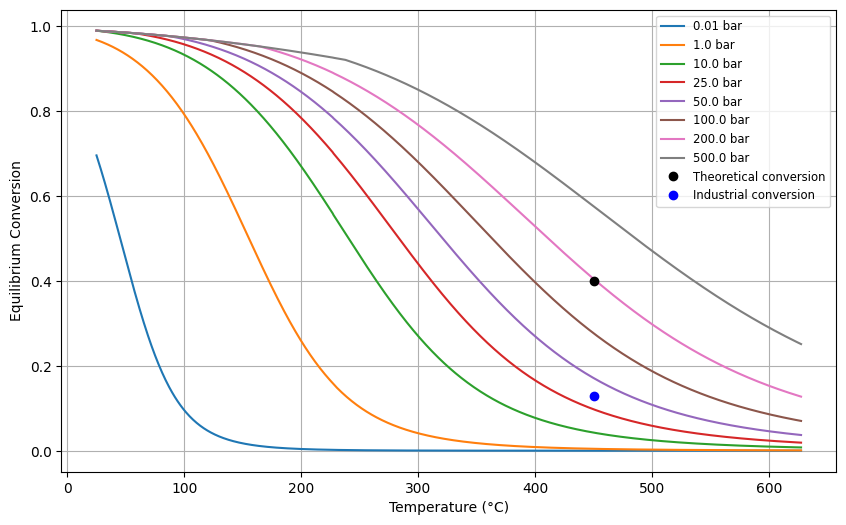

In [16]:

# # Your data and code before this point...

plt.figure(figsize=(10, 6))
for j in range(Xe.shape[1]):
    plt.plot(temps - 273, Xe[:, j], label=f'Column {j+1}')

pressure_strings = [str(val) + ' bar' for val in P]
plt.plot(450, 0.4, 'ko', label='Theoretical conversion')  # Add label parameter here
plt.plot(450, 0.13, 'bo', label='Industrial conversion')

plt.xlabel('Temperature (°C)')
plt.legend(pressure_strings + ['Theoretical conversion'] + ['Industrial conversion'], loc='upper right', fontsize='small')  # Include the label in the legend
plt.ylabel('Equilibrium Conversion')
plt.grid()
plt.show()

